In [1]:
### This script prepare external data(PC9, To) scatter plots and Venn diagrams for figure.py
# Author: Yiyun
import pandas as pd
import os, pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from matplotlib_venn import venn2,venn3

***
**L200 standalone predictions Vs Genome wide Brunello measurements**

In [2]:
### Load and read PC9 standalone data
pc9_dir = '../out/21.0423 Lx PC9/L200only_reg_rf_boruta/anlyz'
df_pc9 = pickle.load(open(os.path.join(pc9_dir,'y_compr_ext.pkl'),'rb'))
# Standalone
pc9_standalone_dir = '../out/21.0707 Lx PC9Standalone/L200only_reg_rf_boruta/anlyz'
df_pc9_standalone = pickle.load(open(os.path.join(pc9_standalone_dir,'y_compr_ext.pkl'),'rb'))

In [3]:
### Format data for plotting
#PC9
df_pc9 = pd.concat([df_pc9['actual'],df_pc9['predicted']], axis = 0).T
df_pc9.columns = ['actual','predicted']
df_pc9_standalone = pd.concat([df_pc9_standalone['actual'],df_pc9_standalone['predicted']], axis = 0).T
df_pc9_standalone.columns = ['actual','predicted']

Text(0, 0.5, 'L200 standalone predictions')

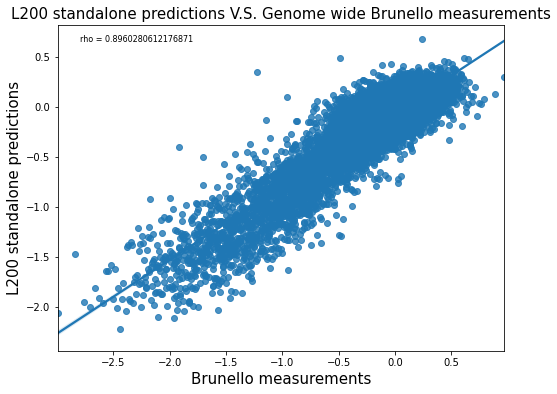

In [4]:
### Plot scatter plot --- PC9 standalone
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.regplot(x='actual', y='predicted',data = df_pc9_standalone)
corr_pear = pearsonr(df_pc9_standalone['actual'], df_pc9_standalone['predicted'])[0]

ax.text(0.05,0.95,'rho = '+str(corr_pear),transform=ax.transAxes,fontsize = 8) #add text
ax.set_title('L200 standalone predictions V.S. Genome wide Brunello measurements', fontsize = 15)
ax.set_xlabel('Brunello measurements', fontsize=15);ax.set_ylabel('L200 standalone predictions', fontsize=15)
# plt.savefig('PC9_standalonel200_exp_pred.pdf')

***
**L200 standalone predictions vs L200 from brunello predictions**

In [5]:
df_pc9_pred = pd.concat([df_pc9['predicted'].T, df_pc9_standalone['predicted'].T], axis = 1)
df_pc9_pred.columns = ['standalone', 'brunello']
df_pc9_pred = df_pc9_pred.dropna()

Text(0, 0.5, 'L200 standalone predictions')

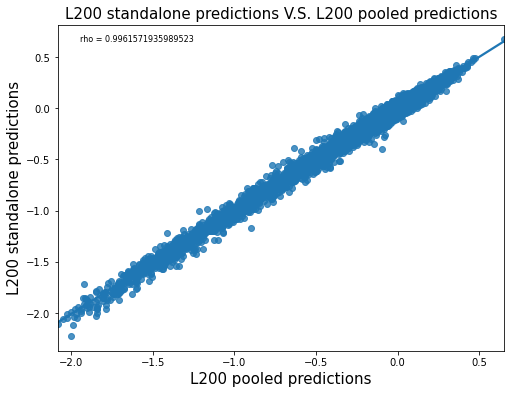

In [6]:
### Plot scatter plot --- PC9 standalone predicted and PC9 predicted
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.regplot(x='standalone', y = 'brunello', data=df_pc9_pred)
corr = pearsonr(df_pc9_pred['standalone'], df_pc9_pred['brunello'])[0]
ax.text(0.05,0.95,'rho = '+str(corr),transform=ax.transAxes,fontsize = 8) #add text
ax.set_title('L200 standalone predictions V.S. L200 pooled predictions', fontsize = 15)
ax.set_xlabel('L200 pooled predictions', fontsize=15);ax.set_ylabel('L200 standalone predictions', fontsize=15)
# plt.savefig('PC9_Q3v.s.standalone_exp_pred.pdf')

***
**Venn Diagram**

In [7]:
### Read prediction files - actual hits are df['actual']
# Brunello
pc9_dir = '../out/21.0423 Lx PC9/L200only_reg_rf_boruta/anlyz'
df_pc9 = pickle.load(open(os.path.join(pc9_dir,'y_compr_ext.pkl'),'rb'))
# Standalone
pc9_standalone_dir = '../out/21.0707 Lx PC9Standalone/L200only_reg_rf_boruta/anlyz'
df_pc9_standalone = pickle.load(open(os.path.join(pc9_standalone_dir,'y_compr_ext.pkl'),'rb'))

In [8]:
nhits = 500
top_standalone = df_pc9_standalone['predicted'].T.sort_values(by =0).head(nhits).index
top_brunello = df_pc9['predicted'].T.sort_values(by =0).head(nhits).index
top_actual = df_pc9['actual'].T.sort_values(by =0).head(nhits).index

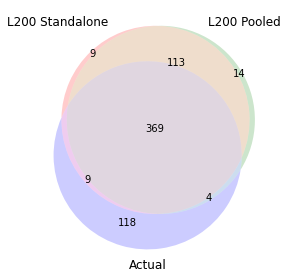

In [9]:
fig, ax = plt.subplots()
venn3([set(top_standalone), set(top_brunello), set(top_actual)], ('L200 Standalone','L200 Pooled','Actual'), alpha = 0.2)
plt.tight_layout()
plt.show()